# GENERAL: TO DELETE

Found some crazy resources which will make our life much easier

> 1. [kaggle EEG Muse (meh)](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-mental-state)
> 1. [Crazy code that makes literally 1000 features for you](https://github.com/jordan-bird/eeg-feature-generation)
> 1. [Explanation of features and their importance ans science and shite](https://link.springer.com/chapter/10.1007/978-3-030-29933-0_37)

-Almu

# General

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 7.98 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 22 files were added from the NOT TIRED category
> 10 files were added from the TIRED category



## Available Features

In [5]:
pd.DataFrame(sample.columns)

,0
0,TimeStamp
1,Delta_TP9
2,Delta_AF7
3,Delta_AF8
4,Delta_TP10
5,Theta_TP9
6,Theta_AF7
7,Theta_AF8
8,Theta_TP10
9,Alpha_TP9


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])

rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 3min 3s


In [8]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


In [9]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
452,2021-11-12 06:29:34.149,NaN,NaN,NaN,NaN,NaN
453,2021-11-12 06:29:34.364,845.347985,590.293040,1199.523810,852.197802,680.146520
454,2021-11-12 06:29:35.364,811.501832,514.542125,695.457875,851.794872,835.677656
455,2021-11-12 06:29:35.788,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(9685, 6) 
Tired Data size is: 		(10796, 6)


## Adding empty column 
Append an empty column in order to run the method.


In [11]:
#Conserve headers
headers = original_NT.columns.values.tolist()

#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))

In [12]:
#Reattach headers
data_T.columns =  np.hstack((headers, ['Empty']));
data_NT.columns = np.hstack((headers, ['Empty']));

#Check
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,2021-11-01 17:27:31.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0
...,...,...,...,...,...,...,...
9680,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179,0.0
9681,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883,0.0
9682,2021-11-02 22:14:36.024,776.849817,800.21978,793.369963,803.040293,482.307692,0.0
9683,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883,0.0


## Remove Empty Rows

In [13]:
data_T = data_T.dropna()

In [14]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps

In [15]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [16]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,1635812851.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0


## Save RAW Data to File

In [17]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


## EEG Feature Generation

In [18]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 50;
Perio = 6;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

C:\Users\Al\anaconda3\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


(119, 984)

In [19]:
Nsamp = 50;
Perio = 5;

xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 984)

```python

%%time

from importlib import reload

flaggity=False

tmp_results=[]
thresh = 95;
for ns in range(50,256,1):
    if (flaggity==True):
        break;
    for p in range(3,8):
        
        try:
            reload(FG);
            xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
            
            xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
        
        except (UnboundLocalError):
            continue;
            
        
        if (xNT.shape[1] == xT.shape[1]):
            print('Cols match!', xT.shape, xNT.shape)
            if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
                print('Thresh met.')
                tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
                flaggity=True;
                break;
                
                
tmp_results

```

In [20]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,...,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.0,0.795194,-0.121172,0.069205,-2.103254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,13.221727,13.962959,10.783482,15.090785,48.215973,0.0,29.464956,27.057741,19.906972,39.864481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,742.197802,753.641026,778.260073,731.721612,730.996337,0.0,-88.384188,-79.917043,-84.016933,-130.084391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,773.142857,786.197802,785.391941,770.543956,795.304029,0.0,-20.452674,-10.171238,-8.063057,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.0,0.764957,3.152271,1.392108,0.776751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,790.065934,797.560440,797.399267,784.102564,849.296703,0.0,18.143992,11.409339,11.061487,15.138016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,797.479853,813.838828,826.329670,816.578755,970.981685,0.0,81.924841,93.667981,65.789165,145.152860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pd.DataFrame(X_NT)

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
0,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,782.571429,798.688645,794.336996,789.582418,827.377289,0.0,3.583346,-14.421597,0.365225,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,778.380952,794.095238,795.062271,745.098901,814.644689,0.0,10.739133,1.946408,1.280510,20.558404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.0,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,0.0,1.439227,-0.123772,-0.581400,4.849069,...,5.439934e-18,8.313440e-19,1.012543e-18,9.806274e-19,7.549416e-19,1.107075e-18,7.246946e-19,9.032981e-19,8.943504e-19,7.033148e-19
std,118.126749,251.525994,217.512393,104.498981,33.160809,0.0,254.559496,381.727887,256.604333,246.614039,...,1.069026e-17,2.118224e-18,1.971696e-18,1.909547e-18,1.923554e-18,4.824729e-18,1.846486e-18,1.758966e-18,1.741543e-18,1.792012e-18
min,732.796093,350.818071,532.069597,664.499389,705.665446,0.0,-628.239954,-655.880639,-731.972815,-460.710955,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,0.0,-34.380751,-320.332371,-73.953916,-43.008357,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,805.189255,626.153846,882.954823,803.308913,794.645910,0.0,-0.355619,88.870928,7.618361,-12.709321,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,934.731380,967.301587,950.042735,876.507937,810.024420,0.0,30.105383,252.124660,124.322869,29.953412,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,0.0,717.580021,901.701208,607.799946,898.762093,...,4.176465e-17,6.183121e-18,4.819705e-18,4.667786e-18,5.614878e-18,2.195698e-17,5.389916e-18,4.299699e-18,4.257108e-18,5.230904e-18


In [23]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

In [24]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [25]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [26]:
print(X_T.shape[0], X_NT.shape[0])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


119 219




## Randomize the Dataset

In [27]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5,Target
0,452.490842,848.168498,779.401709,810.024420,0.0,-0.355619,-495.961098,8.744485,-12.709321,-29.773138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,793.208791,785.553114,775.641026,833.340659,0.0,5.554713,3.152271,-14.197981,-33.045720,-11.280044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,773.626374,796.996337,774.593407,924.241758,0.0,-52.628016,-62.710225,26.770537,-62.341906,39.363681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000.744811,949.639805,843.131868,775.708181,0.0,-20.552845,-77.926418,-19.201847,-42.326010,43.821995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,554.768010,907.869353,799.145299,815.732601,0.0,33.958958,590.617749,124.322869,45.518191,23.631301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,770.644689,822.622711,761.296703,756.622711,0.0,-55.367517,-47.030048,39.658009,-130.084391,-191.522526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,890.879121,1127.735043,835.946276,718.626374,0.0,443.111144,-406.107037,-731.972815,314.076231,-218.204290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
335,774.835165,885.641026,803.308913,820.567766,0.0,-9.760637,110.217782,-64.307386,-63.780516,28.247699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
336,1161.514042,1312.881563,711.306471,767.649573,0.0,-371.911881,-296.480101,-521.356271,-346.156722,-210.118240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Separating Input and Output

In [70]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Y labeled for plotting or result check
def label(n):
    if (n==0):
        return 'Not Tired'
    return 'Tired'

y_labeled = list(map(label, y));

## Splitting Dataset into the Training and Test Sets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [30]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [31]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,973,974,975,976,977,978,979,980,981,982
0,-2.117553,0.038936,-0.273554,-0.023435,0.0,-0.031943,-2.128908,0.059260,-0.101460,-0.338733,...,-0.264386,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
1,0.078518,-0.380487,-0.329833,0.474628,0.0,0.006320,0.033227,-0.084519,-0.242458,-0.148369,...,-0.264386,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
2,-0.047699,-0.303836,-0.345511,2.416384,0.0,-0.370346,-0.252086,0.172228,-0.445576,0.372945,...,-0.264386,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
3,1.416175,0.718632,0.680182,-0.756470,0.0,-0.162696,-0.318002,-0.115878,-0.306801,0.418838,...,-0.264386,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
4,-1.458333,0.438836,0.021913,0.098499,0.0,0.190204,2.578099,0.783582,0.302246,0.211000,...,3.134867,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-0.066917,-0.132180,-0.544499,-1.164159,0.0,-0.388081,-0.184160,0.252993,-0.915253,-2.003741,...,-0.264386,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
334,0.708044,1.911585,0.572648,-1.975806,0.0,2.838988,-1.739664,-4.582770,2.164231,-2.278397,...,-0.264386,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
335,-0.039908,0.289942,0.084223,0.201784,0.0,-0.092829,0.497030,-0.398552,-0.455551,0.258520,...,-0.264386,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908
336,2.452400,3.151771,-1.292614,-0.928612,0.0,-2.437336,-1.264766,-3.262849,-2.413340,-2.195161,...,3.134867,-0.224908,-0.297842,-0.297842,-0.224908,-0.137361,-0.224908,-0.297842,-0.297842,-0.224908


# Principal Component Analysis
## Calculate Principal Components

In [32]:
from sklearn.decomposition import PCA

information = 225; #99.9/100;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-187278.616859,-20887.260779,-9085.943497,1247.794344,-18532.733025,-24029.305457,1781.930679,626.005162,-3600.339204,3991.059763,...,9.514607,19.533624,-76.264634,-51.951752,-79.922579,-95.425935,49.692533,27.657925,102.081994,-40.582441
1,-187280.066298,-20888.057121,-9086.149957,1247.699134,-18533.872110,-24029.264084,1781.842407,626.519025,-3600.455637,3991.246103,...,9.195093,19.781773,-76.239483,-52.595360,-79.555400,-95.299853,50.812232,27.244373,103.099796,-40.181343
2,-187279.915287,-20888.170880,-9086.210017,1247.821355,-18533.956590,-24028.466973,1781.760348,626.491838,-3600.328865,3990.762315,...,9.330738,19.230766,-76.730569,-52.636036,-79.830797,-95.876184,50.379876,27.311218,102.869019,-40.984041
3,-187278.444326,-20887.152028,-9085.820021,1247.680821,-18532.165807,-24029.176690,1781.831628,626.208734,-3598.916462,3991.284000,...,9.096292,19.578552,-76.009482,-52.917671,-79.713977,-96.476787,49.004734,27.458300,102.090366,-40.063682
4,-187278.035341,-20886.468865,-9086.007089,1247.771632,-18532.939130,-24029.308658,1781.723795,626.066773,-3600.027343,3991.141055,...,9.458288,19.188760,-76.585805,-52.279677,-80.315114,-96.186413,49.945894,27.358661,101.179999,-41.626786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-187279.320773,-20888.195314,-9086.518599,1247.902762,-18534.741256,-24022.198103,1782.154211,623.153675,-3601.639891,3991.311703,...,9.147468,19.047013,-76.581909,-52.674788,-80.205069,-95.580761,50.038335,26.609401,102.173924,-40.413553
334,-187262.187405,-20895.851834,-9091.735667,1250.693676,-18535.047446,-24035.536592,1783.021072,618.263526,-3591.617024,3991.529488,...,8.029673,18.930185,-75.990720,-50.784968,-79.242036,-95.801488,49.363896,24.074741,100.753545,-40.771429
335,-187278.345622,-20887.204926,-9085.782073,1247.683836,-18532.153638,-24029.452894,1781.763721,626.281338,-3599.490093,3991.206377,...,9.087088,20.073462,-75.905502,-52.136874,-80.304445,-95.998285,49.578304,28.111632,101.538462,-41.077966
336,-187270.330370,-20889.289204,-9093.261325,1254.353214,-18534.806075,-24029.800266,1781.869242,620.502487,-3599.614559,3990.015073,...,8.114648,19.697850,-75.696650,-52.294867,-78.273018,-95.243474,49.529292,24.686996,100.207445,-42.317207


## Scaling the Principal Components

In [33]:
scZ = StandardScaler();
Z = scZ.fit_transform(Z)
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,-1.709751e-11,-3.468968e-12,2.903312e-12,9.420681e-13,-3.927168e-13,-2.108478e-13,-1.306864e-12,-4.155900e-13,-1.547513e-12,-6.904475e-13,...,-1.549911e-14,-8.661957e-15,-1.624274e-13,-3.862640e-14,2.646831e-14,1.511868e-13,-3.977095e-15,2.409118e-14,8.345313e-14,2.604754e-15
std,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,...,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00
min,-4.355914e-01,-4.926458e+00,-7.726873e+00,-1.050680e+00,-4.445656e+00,-3.273468e+00,-9.393449e+00,-5.446472e+00,-2.982782e+00,-5.320158e+00,...,-4.088626e+00,-4.149466e+00,-1.905558e+00,-2.531039e+00,-3.205199e+00,-3.068757e+00,-4.146214e+00,-5.619958e+00,-3.793129e+00,-3.065987e+00
25%,-4.205249e-01,4.079012e-02,2.013566e-01,-2.771624e-01,-1.794486e-01,-2.336993e-01,-1.046867e-01,8.313674e-02,-2.893932e-01,-1.444030e-01,...,-2.179134e-01,-5.357007e-01,-6.368841e-01,-7.248932e-01,-5.397336e-01,-6.568968e-01,-5.009044e-01,-1.228104e-01,-4.709044e-01,-5.594551e-01
50%,-3.920074e-01,5.712360e-02,2.484963e-01,-2.464367e-01,-5.928157e-02,-1.204904e-01,-1.974460e-02,3.044301e-01,-1.805579e-01,1.043234e-01,...,2.346628e-01,1.252610e-01,-1.410590e-01,-7.317910e-02,-4.683260e-02,1.256887e-01,1.755369e-01,1.128310e-01,1.196920e-01,-1.469007e-01
75%,-9.563693e-02,1.689432e-01,2.845744e-01,-1.713050e-01,2.024139e-01,1.045636e-01,9.576450e-03,3.814911e-01,-2.136566e-02,2.627304e-01,...,6.287405e-01,6.815317e-01,3.976990e-01,5.632133e-01,4.513733e-01,5.904263e-01,6.733644e-01,5.020973e-01,6.399465e-01,7.009125e-01
max,4.650853e+00,3.324376e+00,3.291425e+00,6.138926e+00,2.670388e+00,4.120504e+00,1.051571e+01,2.735236e+00,5.913621e+00,3.702988e+00,...,1.562540e+00,2.927499e+00,3.625929e+00,3.721719e+00,3.801402e+00,3.315989e+00,2.065860e+00,2.045000e+00,1.917936e+00,3.596224e+00


## Image Creation

In [34]:
## Scale all the PCA components on 0-256

def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            pixels.append(m * data[r,c] - mini);

        #once cols are done running
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
    return images;
    
all_images      = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img  = gen_images(Z_test)

#Reshape into input shape for CNN models
x_train_img = np.array(x_train_img).reshape(270,15,15,1)
x_test_img  = np.array(x_test_img).reshape(68,15,15,1)
all_images  = np.array(all_images).reshape(338,15,15,1)

This image is for the: "Tired" class.


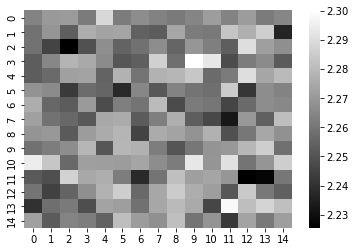

In [73]:
#first row of data
sns.heatmap(gen_images(Z)[0], cmap='gray');
print(f'This image is for the: \"{y_labeled[0]}\" class.')

This image is for the: "Not Tired" class.


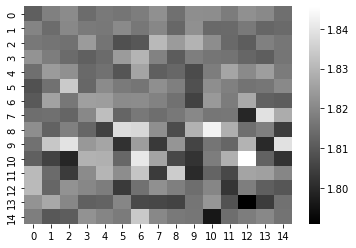

In [75]:
#nth row of data
n=113
sns.heatmap(gen_images(Z)[n], cmap='gray');
print(f'This image is for the: \"{y_labeled[n]}\" class.')

# Data Exploration

## General Correlation Matrix for Principal Components

<Figure size 1800x1200 with 0 Axes>

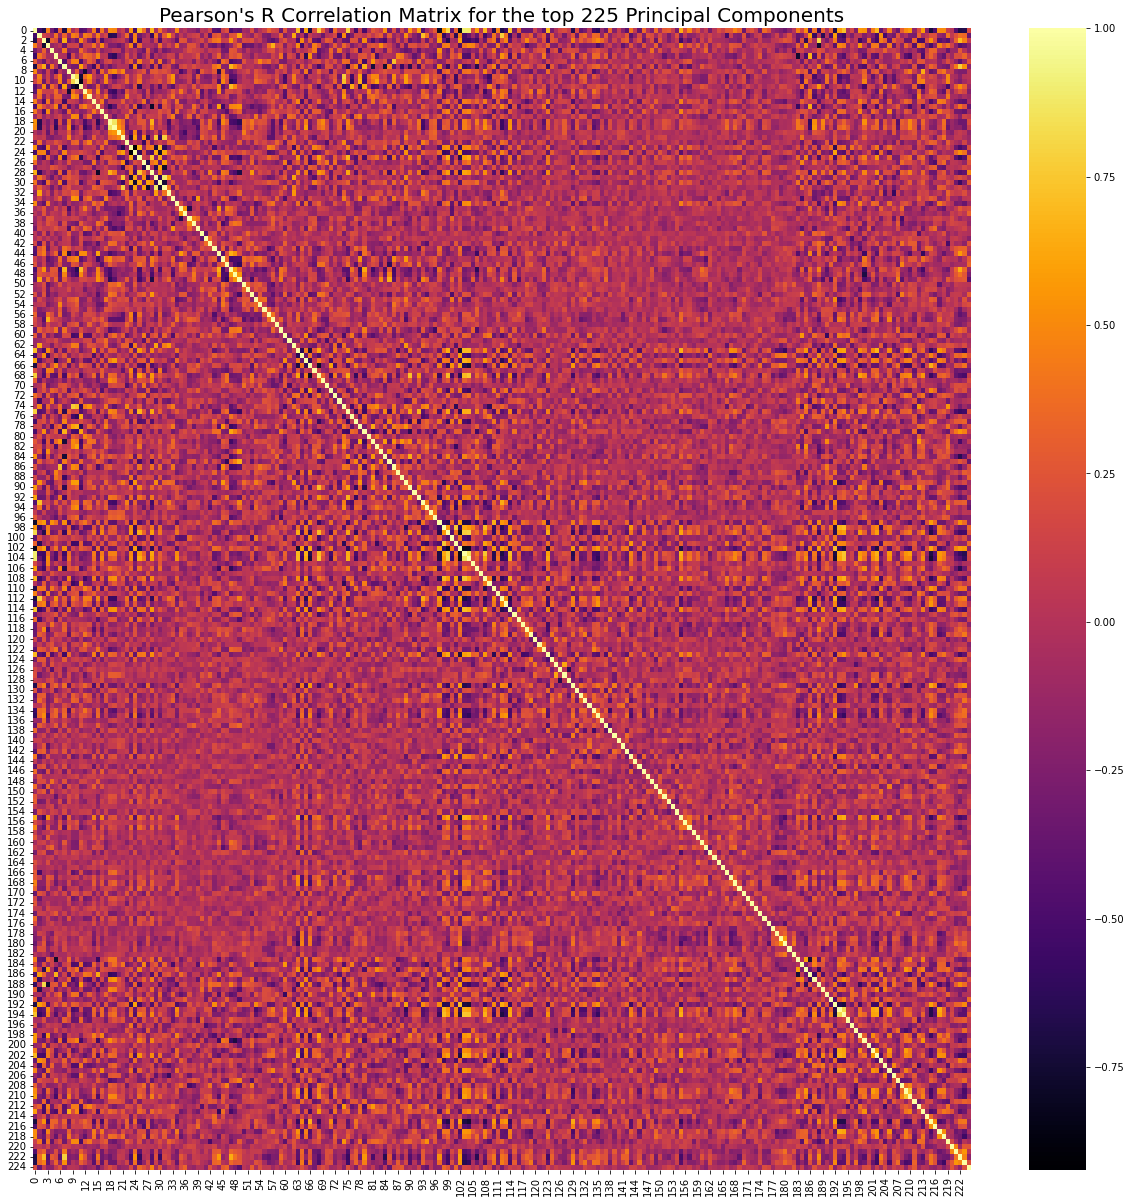

In [37]:
corr_mat = pd.DataFrame(Z).corr(method='pearson');
#mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(21,21));
plt.title("Pearson's R Correlation Matrix for the top 225 Principal Components", fontsize=20);
sns.heatmap(corr_mat, annot=False, lw=0, linecolor='white', cmap='inferno');
#print('Too many features to visualize at once!')

<Figure size 1800x1200 with 0 Axes>

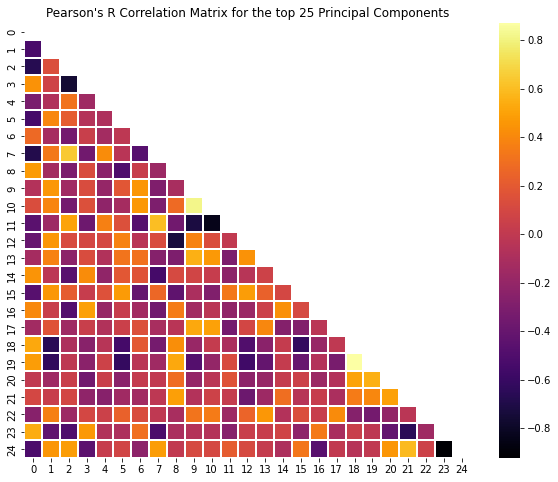

In [38]:
corr_mat = pd.DataFrame(Z[:,0:25]).corr(method='pearson');
mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(10,8));
plt.title("Pearson's R Correlation Matrix for the top 25 Principal Components", fontsize=12);
sns.heatmap(corr_mat, annot=False, lw=0.2, linecolor='white', cmap='inferno', mask=mask);
#print('Too many features to visualize at once!')

## Plotting the Principal Components

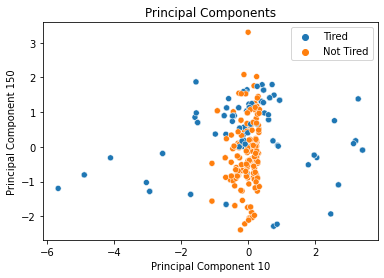

In [69]:
p1=10;
p2=150;
ax1 = sns.scatterplot(x=Z[:,p1], y=Z[:,p2], hue=y_labeled);
ax1.set(title='Principal Components',
        ylabel=f'Principal Component {p2}',
        xlabel=f'Principal Component {p1}');

## PC Distributions

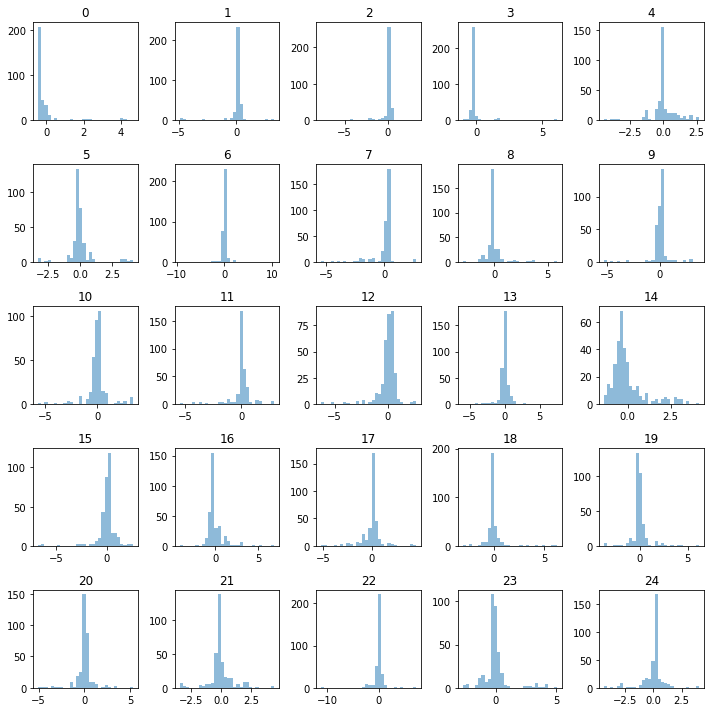

In [40]:
pc_title=[];
for i in range(1,25):
    pc_title.append(f'Principal Component {i}');

Z25 = Z[:,0:25]  

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():      #Catch warnings in code section
    warnings.simplefilter("ignore")
    
    plt.subplots(figsize=(10,10));
    ax = plt.gca();
    pd.DataFrame(Z25).hist(bins=30, figsize=(1,1), grid=False, layout=(5,5), sharex=False, ax=ax, alpha=0.5);
    plt.tight_layout();

# ML Models

## Definitions

In [41]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

## Basic ANN Model

In [42]:
models = []; #to hold: (str: name, model: model, data_to_take: z/img)

In [43]:
def build_basicANN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    #Initializing ANN
    m= tf.keras.models.Sequential()
    
    #Add input layer
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    
    #Add hidden layer
    m.add(tf.keras.layers.Dense(units=(neurons/2), activation='relu'))
    
    #Add output layer
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #Compiling ANN
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Return compiled, unfitted model
    return m;

In [44]:
%%time

#Build Model, Using defaults
## mANNBasic = build_basicANN() 
mANNBasic = (KerasClassifier(build_fn=build_basicANN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#Training ANN
hist_ANNBasic = mANNBasic.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN Basic', mANNBasic, 'z'))

Wall time: 1.01 s


In [45]:
print(f'Accuracy of the unoptimized Basic ANN model = {round(accuracy_score(y_true=y_test, y_pred=mANNBasic.predict(x=Z_test)) * 100,3)}%')

Accuracy of the unoptimized Basic ANN model = 100.0%


## Basic CNN Model

In [46]:
# Random-ish architecture

def build_basicCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Conv2D(filters=neurons, kernel_size=3, activation='relu', input_shape=[15, 15, 1]))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Conv2D(filters=neurons/2, kernel_size=3, activation='relu'))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return m;


In [47]:
%%time

#Build model using defaults
#mCNNBasic = build_basicCNN()
mCNNBasic = (KerasClassifier(build_fn=build_basicCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

hist_CNNBasic = mCNNBasic.fit(x=x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Basic', mCNNBasic, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
Wall time: 2.77 s


In [48]:
print(f'Accuracy of the unoptimized Basic CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNBasic.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Basic CNN model = 100.0%


## Advanced CNN Model

In [49]:
def build_advancedCNN(optimizer='adam', epochs=100, batch_size=50, neurons=256):
    #params
    initFilt = neurons;
    initUnits= neurons;
    
    #model
    m = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=initFilt, kernel_size=3, activation='relu', input_shape=[15,15,1]),
        tf.keras.layers.Conv2D(filters=initFilt/2, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=initUnits),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return m;

In [50]:
%%time

# build using defaults
#mCNNAdvanced = build_advancedCNN()
mCNNAdvanced = (KerasClassifier(build_fn=build_advancedCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#fit
hist_CNNAdvanced = mCNNAdvanced.fit(x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Advanced', mCNNAdvanced, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping
Wall time: 9.02 s


In [51]:
print(f'Accuracy of the unoptimized Advanced CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNAdvanced.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Advanced CNN model = 100.0%


## Random Forest Model

In [52]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(Z_train, y_train);
models.append(('RF', RFCmodel, 'z'));

Wall time: 237 ms


## Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='newton-cg');
LRmodel.fit(Z_train, y_train);
models.append(('LR',LRmodel, 'z'));

# Performance Comparison
## Via K-Fold Cross-Validation

In [54]:
# kfold = StratifiedKFold(n_splits=N, shuffle=True)
# tmp_results = model_selection.cross_val_score(mANNBasic, Z, y, cv=kfold, scoring=scoring);
# pd.DataFrame(tmp_results)

In [55]:
#Suppress warnings for non-convergent ANN models
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Number of splits to make.
N = 3;


CV_results = [];
scoring = 'accuracy';

trun=0;
for tp in models:
    
    #Check whether model uses Z dataset or images for training
    mode = tp[2];
    
    if (mode == 'z'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], Z, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));
        
    if (mode == 'img'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], all_images, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));    
    
    print(f'run#{trun} returned {CVinternal_results}')
    trun+=1;
    
    

run#0 returned [1. 1. 1.]
run#1 returned [0.72566372 0.72566372 0.76785714]
run#2 returned [0.6460177  0.68141593 0.65178571]
run#3 returned [1. 1. 1.]
run#4 returned [1. 1. 1.]


In [77]:
pd.DataFrame(CV_results).T

,0,1,2
ANN Basic,1.000000,1.000000,1.000000
CNN Basic,0.725664,0.725664,0.767857
CNN Advanced,0.646018,0.681416,0.651786
RF,1.000000,1.000000,1.000000
LR,1.000000,1.000000,1.000000


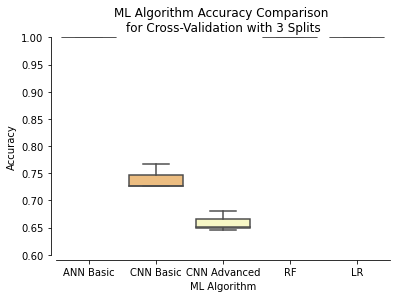

In [57]:
names = [];
for tp in models:
    names.append(tp[0]);

CV_results = pd.DataFrame(CV_results).T;
CV_results.columns = names;

ax2 = sns.boxplot(data=CV_results, palette='Spectral')
ax2.set(xlabel = "ML Algorithm",
       ylabel = 'Accuracy',
       title = f"ML Algorithm Accuracy Comparison \nfor Cross-Validation with {N} Splits");
sns.despine(ax=ax2,offset=5, trim=False)
ax2.plot();
plt.ylim(0.6,1);

In [58]:
#reset data
#data_T = original_T.copy();
#data_NT = original_NT.copy();

#Reload FG
#from importlib import reload
#reload(FG)